In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unidecode import unidecode

In [201]:
data = pd.read_csv('imiona.csv')
data.drop(['WOJ', 'PŁEĆ'], axis=1, inplace=True)

In [202]:
regions = data['WOJEWÓDZTWO'].unique()
regional_data = []

### Dataframe for each region with % of each male name
Deleted the column 'WOJ' and 'PŁEĆ' - region index and sex - as they are not needed for the analysis.

In [203]:
for idx, region in enumerate(regions):
    regional_data.append(data[data['WOJEWÓDZTWO'] == region].copy()) 
    regional_data[idx].reset_index(drop=True, inplace=True)
    regional_data[idx].drop(['WOJEWÓDZTWO'], axis=1, inplace=True)
    regional_data[idx].sort_values(by='LICZBA_WYSTĄPIEŃ', ascending=False, inplace=True)
    regional_data[idx]['%'] = round(regional_data[idx]['LICZBA_WYSTĄPIEŃ'] / regional_data[idx]['LICZBA_WYSTĄPIEŃ'].sum() * 100, 2)

### Bar chart of top 5 most popular male newborn names in each region by %
Display of their respective % makes much more sense than the number of newborns as the regions have different populations. 

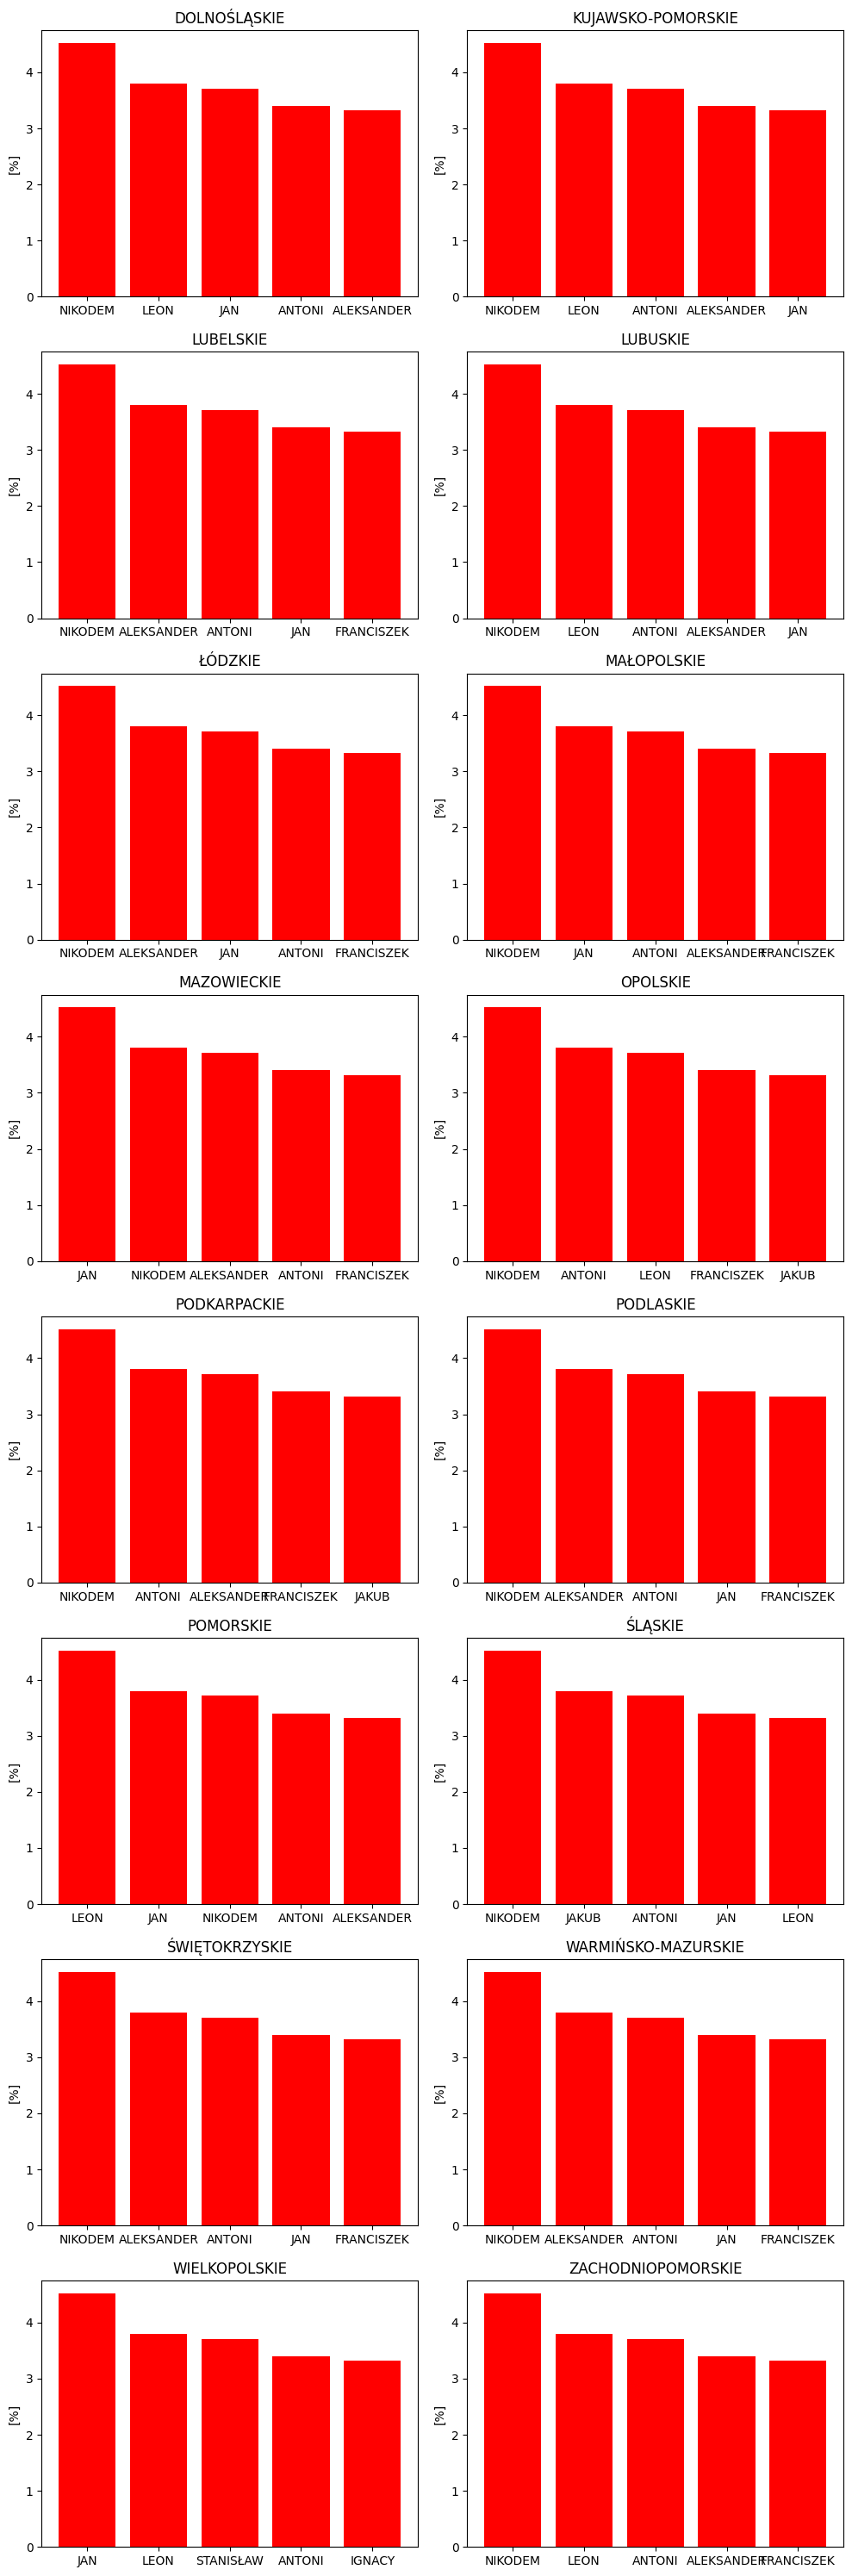

In [204]:
fig, axs = plt.subplots(8, 2, figsize=(10, 30))

for i in range(8):
    for j in range(2):
        idx = i * 2 + j 
        if idx < len(regional_data):
            axs[i, j].bar(regional_data[idx].loc[0:4, 'IMIĘ_PIERWSZE'], regional_data[11].loc[0:4, '%'], color='red')
            axs[i, j].set_ylabel('[%]')
            axs[i, j].set_title(regions[idx])

plt.tight_layout()
plt.show()

### Bar chart of top 10 most popular across whole Poland by %

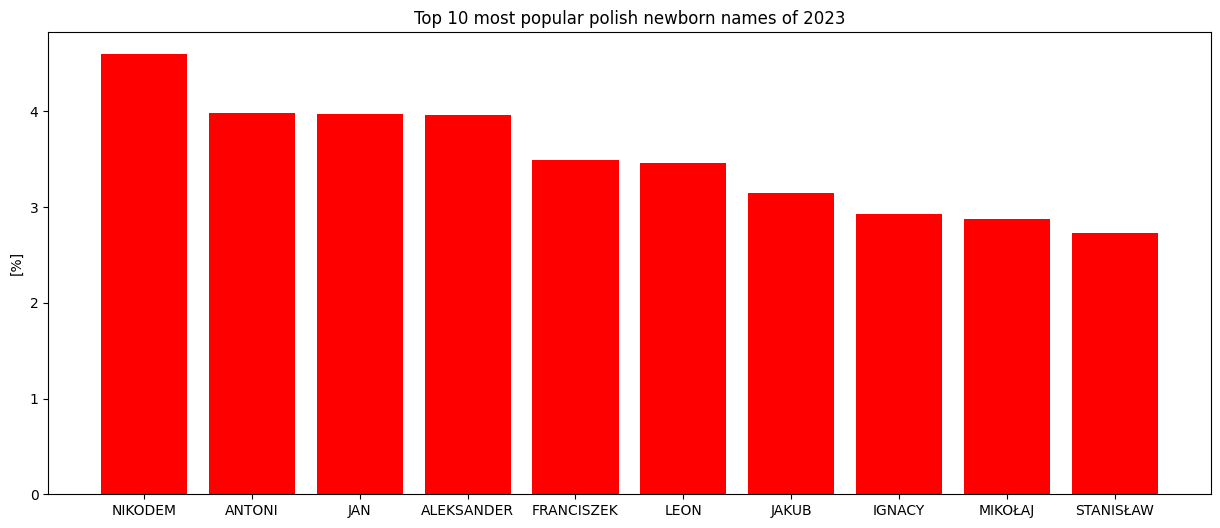

In [205]:
names = list(data['IMIĘ_PIERWSZE'].unique())
name_count = []
for name in names:
    name_count.append(data[data['IMIĘ_PIERWSZE'] == name]['LICZBA_WYSTĄPIEŃ'].sum())

total = sum(name_count)
    
top_names = []
top_values = []
for i in range(10):
    max_index = name_count.index(max(name_count))
    top_names.append(names.pop(max_index))
    top_values.append(name_count.pop(max_index)/total*100)

plt.figure(figsize=(15, 6))
plt.bar(top_names, top_values, color='red')

plt.ylabel('[%]')
plt.title('Top 10 most popular polish newborn names of 2023')

plt.show()

### Bar chart of number and % of newborns specifically named in each region
You can choose the name by changing the variable `name` to any name from the dataset.

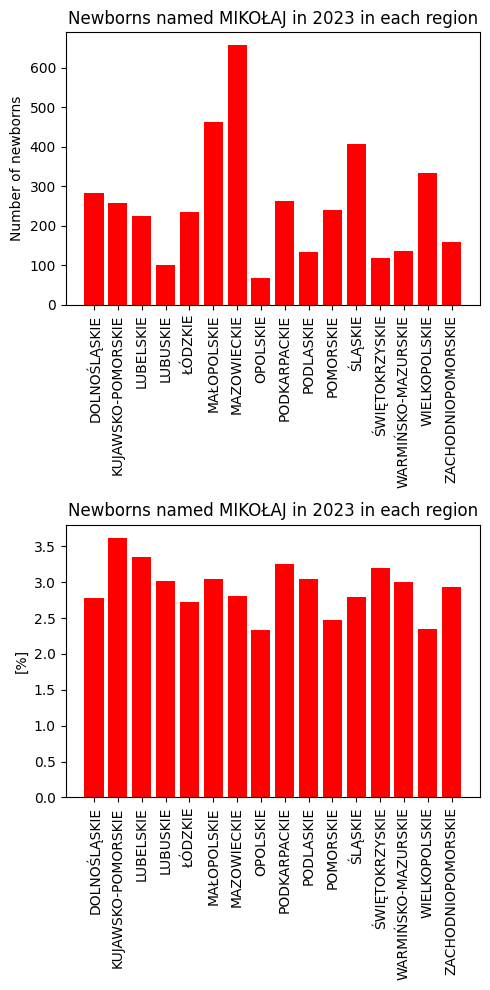

In [206]:
name = 'MIKOŁAJ'
region_name_count = []
region_name_percent = []

for region in regional_data:
    region_name_count.append(region[region['IMIĘ_PIERWSZE'] == name]['LICZBA_WYSTĄPIEŃ'].sum())
    region_name_percent.append(region[region['IMIĘ_PIERWSZE'] == name]['%'].sum())

if sum(region_name_count) and sum(region_name_percent): 
    fig, axs = plt.subplots(2, 1, figsize=(5, 10))
    for i in range(2):
        y = region_name_count if i == 0 else region_name_percent
        axs[i].bar(regions, y, color='red')
        axs[i].set_xticks(np.arange(len(regions)))  # Set x-ticks
        axs[i].set_xticklabels(regions, rotation='vertical')
        axs[i].set_title(f'Newborns named {name} in 2023 in each region')
        axs[i].set_ylabel('Number of newborns' if i == 0 else '[%]')
    plt.tight_layout()
    plt.show()
else:
    print(f'Name {name} was not given to any newborn in 2023')